In [43]:
# We create a Neural Network... from scratch.
# We load our data...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import io

In [64]:
# We load our data...
data = pd.read_csv('C:\\Users\\...\\Downloads\\occupancy_data\\datatraining.txt').drop(columns = ['date'])

# We create a variable with our X data...
X = np.array(data.drop(columns = ['Occupancy']))

# We create a variable with our y data...
y = np.array(data['Occupancy'].values.reshape(X.shape[0], 1))

# We split our data...
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 7)

# We standardize our data...
stdizer = StandardScaler()

# We fit our standardizer...
stdizer.fit(X)

# We transform our data...
xTrain = stdizer.transform(xTrain)
xTest = stdizer.transform(xTest)

In [75]:
# At this point, our data is cleaned. Therefore, we write our NN...
class NeuralNet():
    '''
        A two layer Neural Network...
    '''
    
    def __init__(self, layers = [5, 3, 1], learning_rate = 0.001, iterations = 100):
        self.params = {}
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.X = None
        self.y = None
        
    def init_weights(self):
        '''
            Initialize random weights for learning...
        '''
        np.random.seed(7) # For comparing changes...
        self.params['W1'] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1], self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2])
        
    def relu(self,Z):
        return np.maximum(0, Z)
    
    def sigmoid(self,Z):
        return 1.0 / (1.0 + np.exp(-Z))
    
    def entropy_loss(self, y, ypred):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(ypred), y) + np.multiply((1-y), np.log(1 - ypred))))
        return loss
    
    def forward_propagation(self):
        '''
            Move forward...
        '''
        # If iteration = 1, we get random values for forward propagation...
        # Else, we return the results from the previous iteration.
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        
        # We return the values to relu for activation...
        A1 = self.relu(Z1)
        
        # We now weight and sum the results from relu...
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        
        # We pass the results to our classifier...
        ypred = self.sigmoid(Z2)
        
        # We return how well the iteration has learned...
        loss = self.entropy_loss(self.y, ypred)
        
        # Save values for future iterations...
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        
        return ypred, loss

    def back_propagation(self, ypred):
        def deriv_relu(x):
            x[x<0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_ypred = -(np.divide(self.y,ypred) - np.divide((1 - self.y),(1-ypred)))
        dl_wrt_sig = ypred * (1-ypred)
        dl_wrt_z2 = dl_wrt_ypred * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * deriv_relu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0) 
        
              
        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
    
    def fit(self, X, y):
            '''
            Trains the neural network using the specified data and labels
            '''
            self.X = X
            self.y = y
            self.init_weights() #initialize weights and bias


            for i in range(self.iterations):
                ypred, loss = self.forward_propagation()
                self.back_propagation(ypred)
                self.loss.append(loss)
                

    def predict(self, X):
            '''
            Predicts on a test data
            '''
            Z1 = X.dot(self.params['W1']) + self.params['b1']
            A1 = self.relu(Z1)
            Z2 = A1.dot(self.params['W2']) + self.params['b2']
            pred = self.sigmoid(Z2)
            return np.round(pred)      
        
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()        

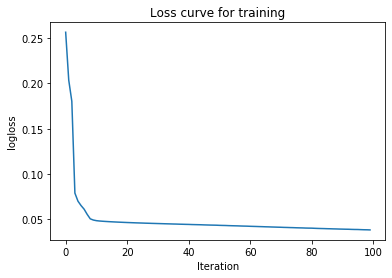

In [76]:
nn = NeuralNet()
nn.fit(xTrain, yTrain)
nn.plot_loss()

In [77]:
train_pred = nn.predict(xTrain)
test_pred = nn.predict(xTest)

print("Train accuracy is {}".format(nn.acc(yTrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(yTest, test_pred)))

Train accuracy is 98
Test accuracy is 98
